In [1]:
!pip install folktables
!pip install matplotlib seaborn



In [2]:
import pandas as pd

file_path = r"adult_reconstruction.csv"

df = pd.read_csv(file_path)

print(df.head())


   hours-per-week  age  capital-gain  capital-loss workclass     education  \
0              20   40             0             0   Private     Bachelors   
1              40   21             0             0   Private  Some-college   
2              10   17             0             0   Private          11th   
3              50   51             0             0   Private       HS-grad   
4              38   28             0             0   Private     Bachelors   

   education-num      marital-status   relationship                race  \
0             13  Married-civ-spouse           Wife               White   
1             10            Divorced      Own-child               White   
2              7       Never-married      Own-child               White   
3              9  Married-civ-spouse        Husband  Asian-Pac-Islander   
4             13       Never-married  Not-in-family               White   

   gender native-country  income       occupation  
0  Female  United-States   4

In [3]:
for column in df.columns:
    print(f"\n--- {column} ---")
    print(df[column].unique())



--- hours-per-week ---
[20 40 10 50 38 99 24 45 42 30 32 60 35 52 37 36 70 12 55 15 17 80 43 65
 39  4 49 48 18 28 22 56 25 44 68  8  5 14  2 16 64 75 87 47 33 90 84 46
 13  7 19 51 41 59 21 57 27 98 54 11 34 66  6 92  3 72 58 62  9  1 26 53
 78 23 67 85 61 63 31 29 73 77 97 76 96 81 88 94 91 95 74 86 89 79 69 82]

--- age ---
[40 21 17 51 28 26 44 81 45 37 24 29 33 23 59 56 41 38 35 34 43 22 30 27
 50 48 25 46 32 62 20 53 52 39 47 18 68 57 42 36 64 19 49 54 31 61 78 70
 58 87 55 73 75 65 63 60 66 72 71 69 77 90 67 76 74 83 80 79 85 84 82 89
 88 86]

--- capital-gain ---
[    0  2354 15024 14084  7688  4064  7298  1055  4386  2176  3781  3103
  5178   594  3137  3464  6418  2885  2653  5013  3411  2597 10566  2964
  2174  4865  4787  4650 25236  3908  9386  3456  2346  6849  6767  3674
  2202  8614  1506  2907  2463  2290 99999  2635  6360  1424 20051 15020
 10520  3325  3818   114  1471 14344 27828  2829  4508  5721  2228  2329
  1639  2050 13550  4101  4416  4934  1797  6497  1086  

## Data Preprocessing

### Dropping missing values ('?')

In [4]:
import numpy as np
df.replace('?', np.nan, inplace=True)
df = df.dropna()
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 45849 entries, 0 to 49530
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   hours-per-week  45849 non-null  int64 
 1   age             45849 non-null  int64 
 2   capital-gain    45849 non-null  int64 
 3   capital-loss    45849 non-null  int64 
 4   workclass       45849 non-null  object
 5   education       45849 non-null  object
 6   education-num   45849 non-null  int64 
 7   marital-status  45849 non-null  object
 8   relationship    45849 non-null  object
 9   race            45849 non-null  object
 10  gender          45849 non-null  object
 11  native-country  45849 non-null  object
 12  income          45849 non-null  int64 
 13  occupation      45849 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB
None
hours-per-week    0
age               0
capital-gain      0
capital-loss      0
workclass         0
education         0
education-num    

### Mapping categorical features in subgroups

In [5]:
mapping = {
    'Private': 'Private',
    'Self-emp-not-inc': 'Private',
    'Self-emp-inc': 'Private',
    'Federal-gov': 'Government',
    'Local-gov': 'Government',
    'State-gov': 'Government',
    'Without-pay': 'Unemployed',
    'Never-worked': 'Unemployed',
    '?': 'Unknown'
}
education_mapping = {
    'Doctorate': 'Graduate',
    'Masters': 'Graduate',
    'Prof-school': 'Graduate',
    'Bachelors': 'College',
    'Some-college': 'College',
    'Assoc-acdm': 'College',
    'Assoc-voc': 'College',
    'HS-grad': 'High School',
    '12th': 'High School',
    '11th': 'Less than High School',
    '10th': 'Less than High School',
    '9th': 'Less than High School',
    '7th-8th': 'Less than High School',
    '5th-6th': 'Less than High School',
    '1st-4th': 'Less than High School',
    'Preschool': 'Less than High School'
}
marital_mapping = {
    'Married-civ-spouse': 'Married',
    'Married-spouse-absent': 'Married',
    'Married-AF-spouse': 'Married',
    'Never-married': 'Never Married',
    'Divorced': 'Separated/Divorced',
    'Separated': 'Separated/Divorced',
    'Widowed': 'Widowed'
}
continent_mapping = {
    # North America
    'United-States': 'North America',
    'Puerto-Rico': 'North America',
    'Canada': 'North America',
    'Outlying-US(Guam-USVI-etc)': 'North America',
    'Mexico': 'North America',

    # Central & South America
    'Honduras': 'Central & South America',
    'Jamaica': 'Central & South America',
    'Dominican-Republic': 'Central & South America',
    'Ecuador': 'Central & South America',
    'Columbia': 'Central & South America',
    'Guatemala': 'Central & South America',
    'Nicaragua': 'Central & South America',
    'El-Salvador': 'Central & South America',
    'Trinadad&Tobago': 'Central & South America',
    'Peru': 'Central & South America',
    'Haiti': 'Central & South America',
    'Cuba': 'Central & South America',

    # Asia
    'Laos': 'Asia',
    'Cambodia': 'Asia',
    'India': 'Asia',
    'Japan': 'Asia',
    'China': 'Asia',
    'Iran': 'Asia',
    'Philippines': 'Asia',
    'Vietnam': 'Asia',
    'Taiwan': 'Asia',
    'Thailand': 'Asia',
    'Hong': 'Asia',
    'Laos': 'Asia',

    # Europe
    'England': 'Europe',
    'Germany': 'Europe',
    'Greece': 'Europe',
    'Italy': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Ireland': 'Europe',
    'France': 'Europe',
    'Hungary': 'Europe',
    'Scotland': 'Europe',
    'Yugoslavia': 'Europe',
    'Holand-Netherlands': 'Europe',

    # Unknown/Other
    '?': 'Unknown',
    'South': 'Unknown'  # unclear value
}

relationship_mapping = {
    'Wife': 'Married',
    'Husband': 'Married',
    'Own-child': 'Child',
    'Other-relative': 'Other-relative',
    'Not-in-family': 'Not-in-family',
    'Unmarried': 'Unmarried'
}

# Workclass privilege
privilege_workclass = {
    'Private': 'Not Privileged Workclass',
    'Government': 'Privileged Workclass',
    'Unemployed': 'Not Privileged Workclass',
    'Unknown': 'Unknown Workclass'
}

# Education privilege
privilege_education = {
    'Graduate': 'Privileged Education',
    'College': 'Privileged Education',
    'High School': 'Not Privileged Education',
    'Less than High School': 'Not Privileged Education'
}

# Marital privilege
privilege_marital = {
    'Married': 'Privileged Marital',
    'Never Married': 'Not Privileged Marital',
    'Separated/Divorced': 'Not Privileged Marital',
    'Widowed': 'Not Privileged Marital'
}

# Relationship privilege
privilege_relationship = {
    'Married': 'Privileged Relationship',
    'Child': 'Not Privileged Relationship',
    'Not-in-family': 'Not Privileged Relationship',
    'Unmarried': 'Not Privileged Relationship',
    'Other-relative': 'Not Privileged Relationship'
}

# Gender privilege
privilege_gender = {
    'Male': 'Privileged Gender',
    'Female': 'Not Privileged Gender'
}

# Race privilege
privilege_race = {
    'White': 'Privileged Race'
    # All others will be filled as Not Privileged Race
}

# Country
privilege_country = {
    # Privileged (mostly Western nations)
    'United-States': 'Privileged Country',
    'Canada': 'Privileged Country',
    'England': 'Privileged Country',
    'Germany': 'Privileged Country',
    'France': 'Privileged Country',
    'Ireland': 'Privileged Country',
    'Scotland': 'Privileged Country',
    'Holand-Netherlands': 'Privileged Country',
    'Greece': 'Privileged Country',
    'Italy': 'Privileged Country',
    'Poland': 'Privileged Country',
    'Portugal': 'Privileged Country',
    'Hungary': 'Privileged Country',

    # Not Privileged (Global South and developing regions)
    'Mexico': 'Not Privileged Country',
    'Puerto-Rico': 'Not Privileged Country',
    'Outlying-US(Guam-USVI-etc)': 'Not Privileged Country',
    'Honduras': 'Not Privileged Country',
    'Jamaica': 'Not Privileged Country',
    'Dominican-Republic': 'Not Privileged Country',
    'Ecuador': 'Not Privileged Country',
    'Columbia': 'Not Privileged Country',
    'Guatemala': 'Not Privileged Country',
    'Nicaragua': 'Not Privileged Country',
    'El-Salvador': 'Not Privileged Country',
    'Trinadad&Tobago': 'Not Privileged Country',
    'Peru': 'Not Privileged Country',
    'Haiti': 'Not Privileged Country',
    'Cuba': 'Not Privileged Country',
    'Laos': 'Not Privileged Country',
    'Cambodia': 'Not Privileged Country',
    'India': 'Not Privileged Country',
    'Japan': 'Not Privileged Country',
    'China': 'Not Privileged Country',
    'Iran': 'Not Privileged Country',
    'Philippines': 'Not Privileged Country',
    'Vietnam': 'Not Privileged Country',
    'Taiwan': 'Not Privileged Country',
    'Thailand': 'Not Privileged Country',
    'Hong': 'Not Privileged Country',
    'Yugoslavia': 'Not Privileged Country',
    'South': 'Not Privileged Country'
}


In [6]:
df['workclass_mapped'] = df['workclass'].map(mapping)
df['education_mapped'] = df['education'].map(education_mapping)
df['marital_mapped'] = df['marital-status'].map(marital_mapping)
df['continent'] = df['native-country'].map(continent_mapping)
df['relationship_mapped'] = df['relationship'].map(relationship_mapping)
df['race_privilige'] = df['race'].map(privilege_race).fillna('Not Privileged Race')
df['workclass_privilige'] = df['workclass_mapped'].map(privilege_workclass)
df['education_privilige'] = df['education_mapped'].map(privilege_education)
df['marital_privilige'] = df['marital_mapped'].map(privilege_marital)
df['relationship_privilige'] = df['relationship_mapped'].map(privilege_relationship)
df['country_privilege'] = df['native-country'].map(privilege_country).fillna('Not Privileged Country')


In [7]:
def prettify_column(col):
    return col.replace('_', ' ').capitalize()

In [8]:
#df = df.drop(columns=['workclass', 'education', 'marital-status', 'native-country', 'education-num','relationship'])


## Data analysis - categorical features

In [9]:
#df.columns

### Original columns plots

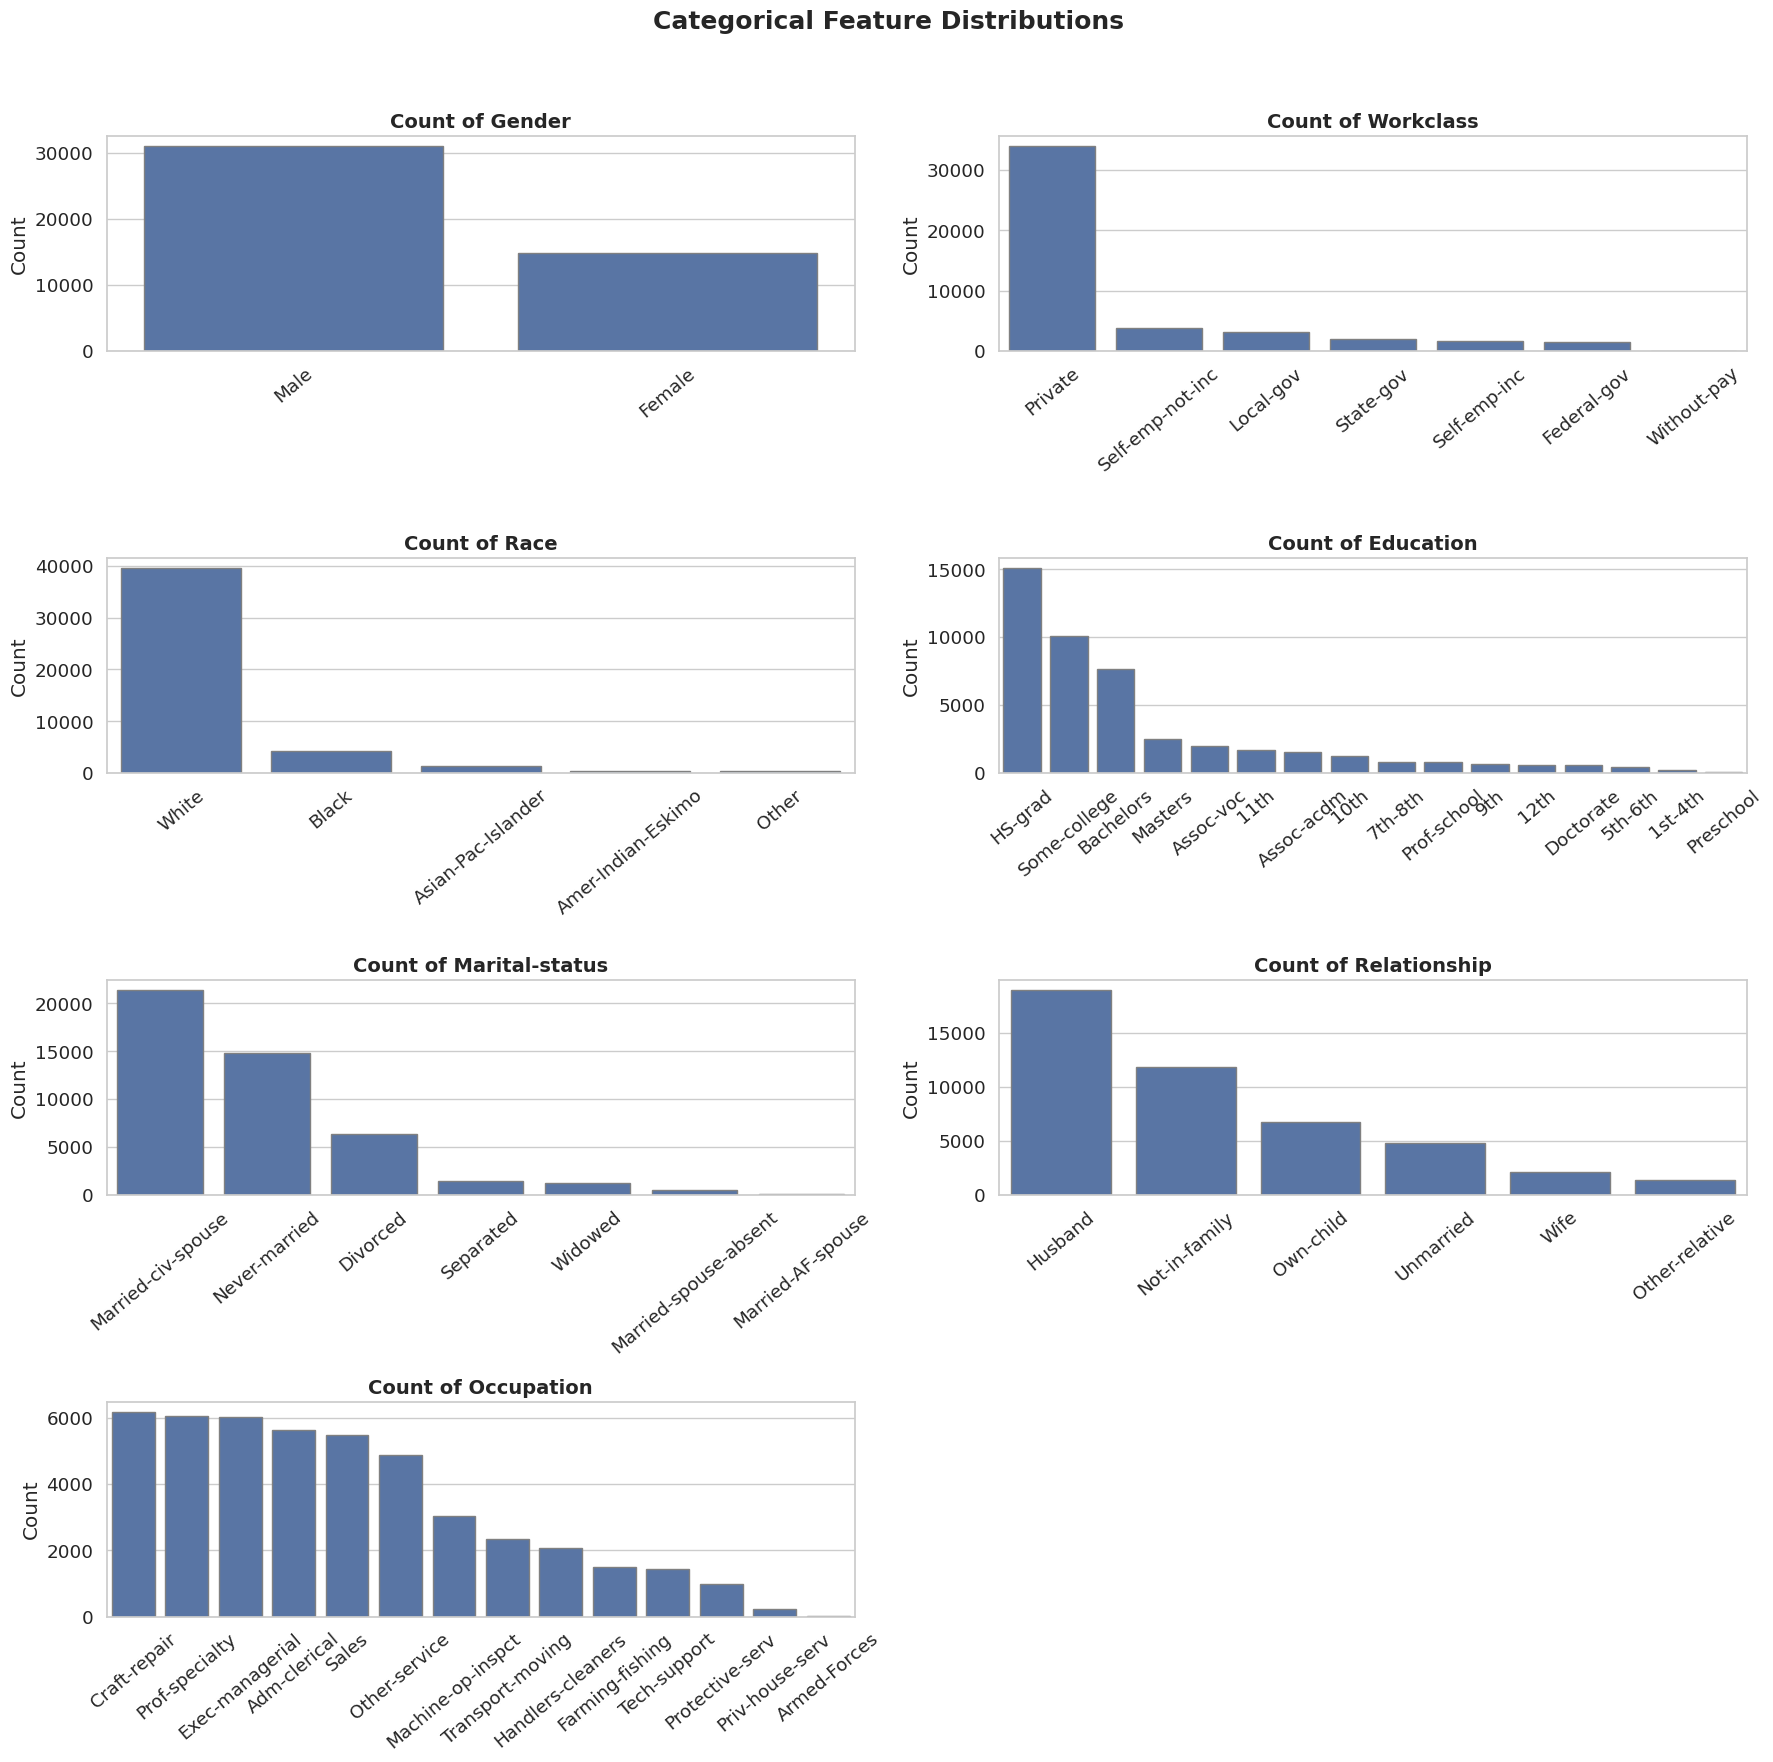

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern seaborn theme
sns.set_theme(style="whitegrid", palette="deep", font_scale=1.2)

cat_cols = ['gender', 'workclass', 'race','education', 'marital-status', 'relationship', 'occupation']

n = len(cat_cols)
cols = 2  # number of columns in the grid
rows = (n + 1) // cols  # number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 4.5))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i],
                  order=df[col].value_counts().index,
                  edgecolor='gray')
    axes[i].set_title(f'Count of {prettify_column(col)}', fontsize=14, weight='bold')
    axes[i].tick_params(axis='x', rotation=40)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Categorical Feature Distributions", fontsize=18, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for the super title
plt.show()


### 1-st level mapping plots

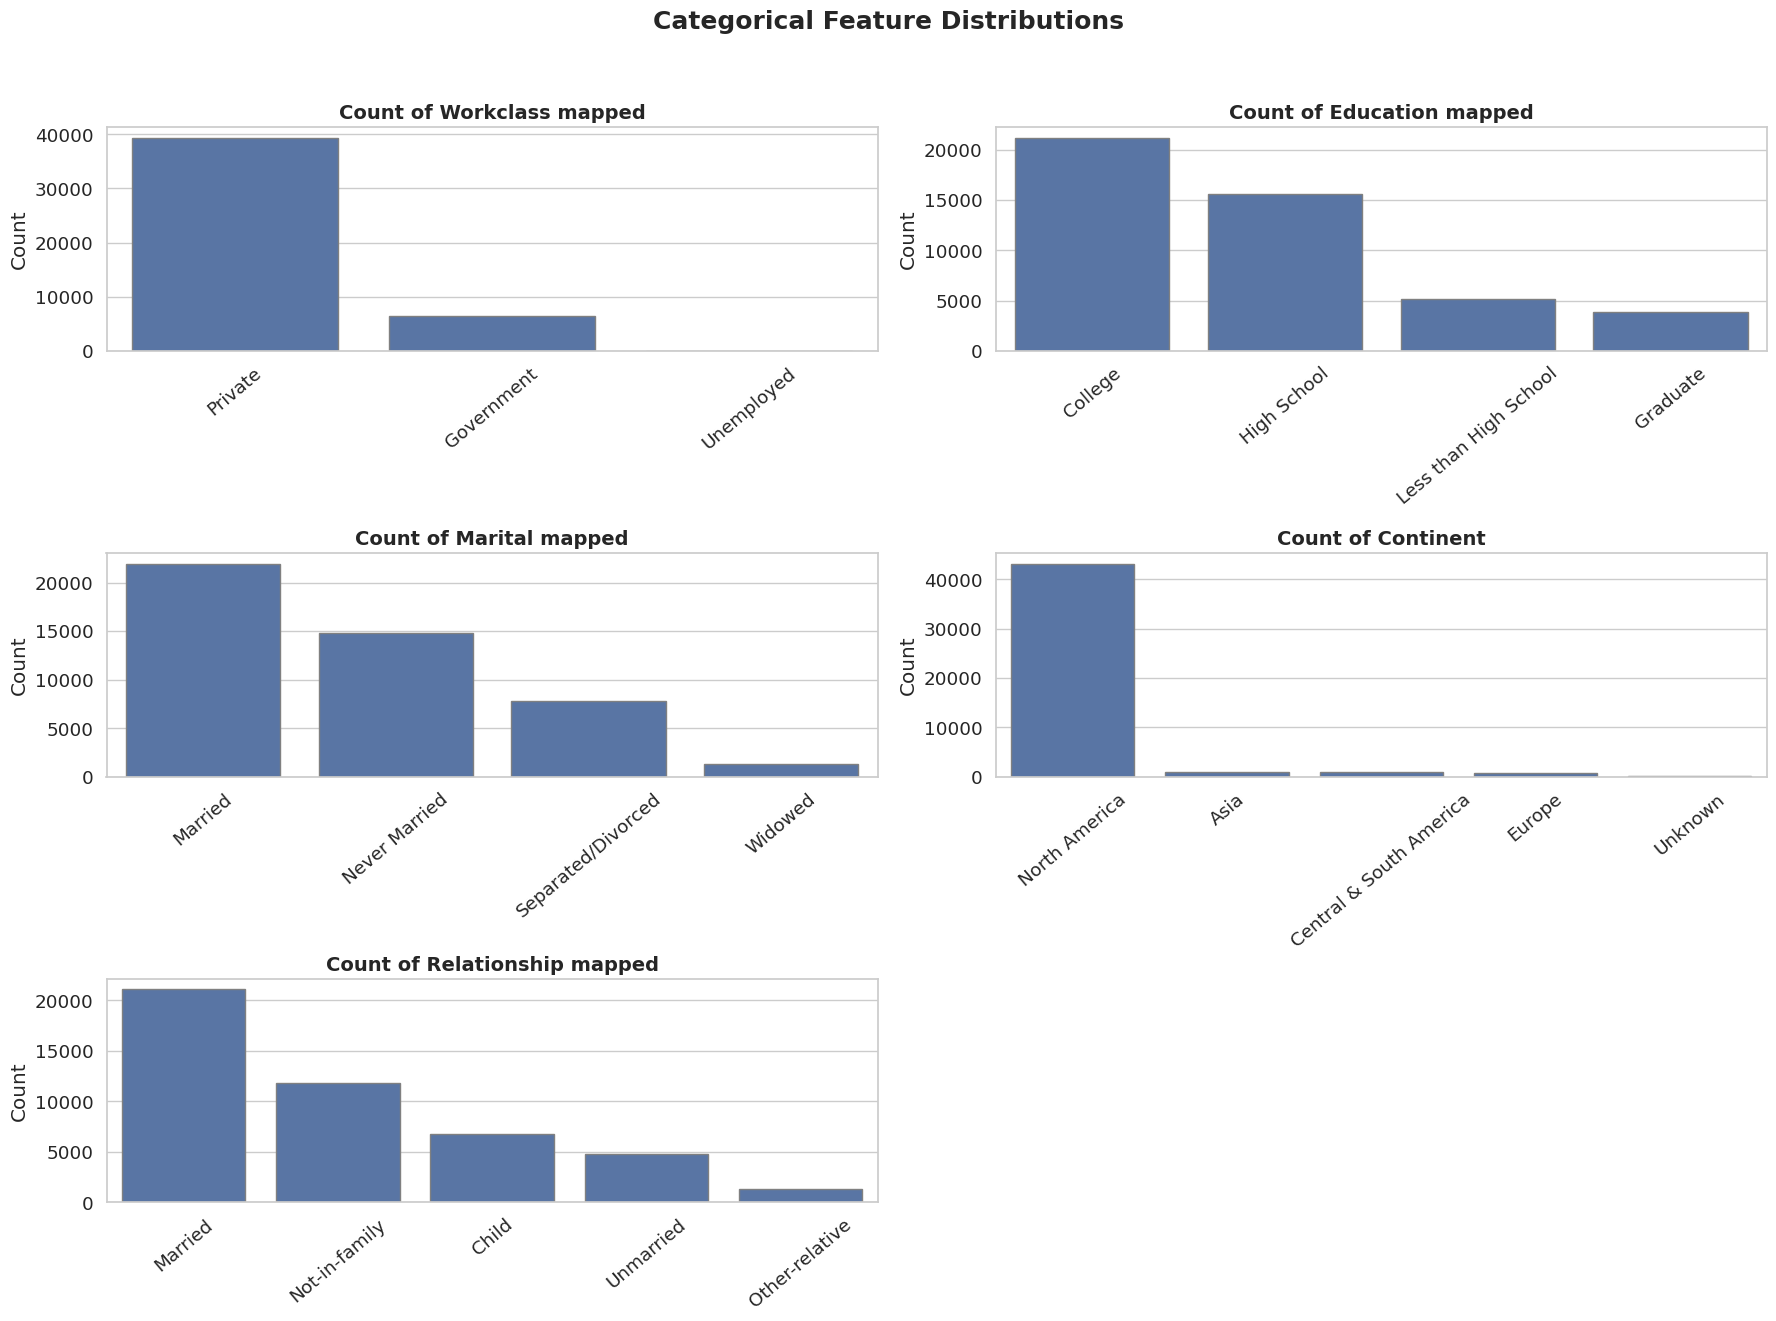

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern seaborn theme
sns.set_theme(style="whitegrid", palette="deep", font_scale=1.2)

cat_cols = ['workclass_mapped',
       'education_mapped', 'marital_mapped', 'continent',
       'relationship_mapped']

n = len(cat_cols)
cols = 2  # number of columns in the grid
rows = (n + 1) // cols  # number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 4.5))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i],
                  order=df[col].value_counts().index,
                  edgecolor='gray')
    axes[i].set_title(f'Count of {prettify_column(col)}', fontsize=14, weight='bold')
    axes[i].tick_params(axis='x', rotation=40)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Categorical Feature Distributions", fontsize=18, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for the super title
plt.show()


### 2-level mapping plots

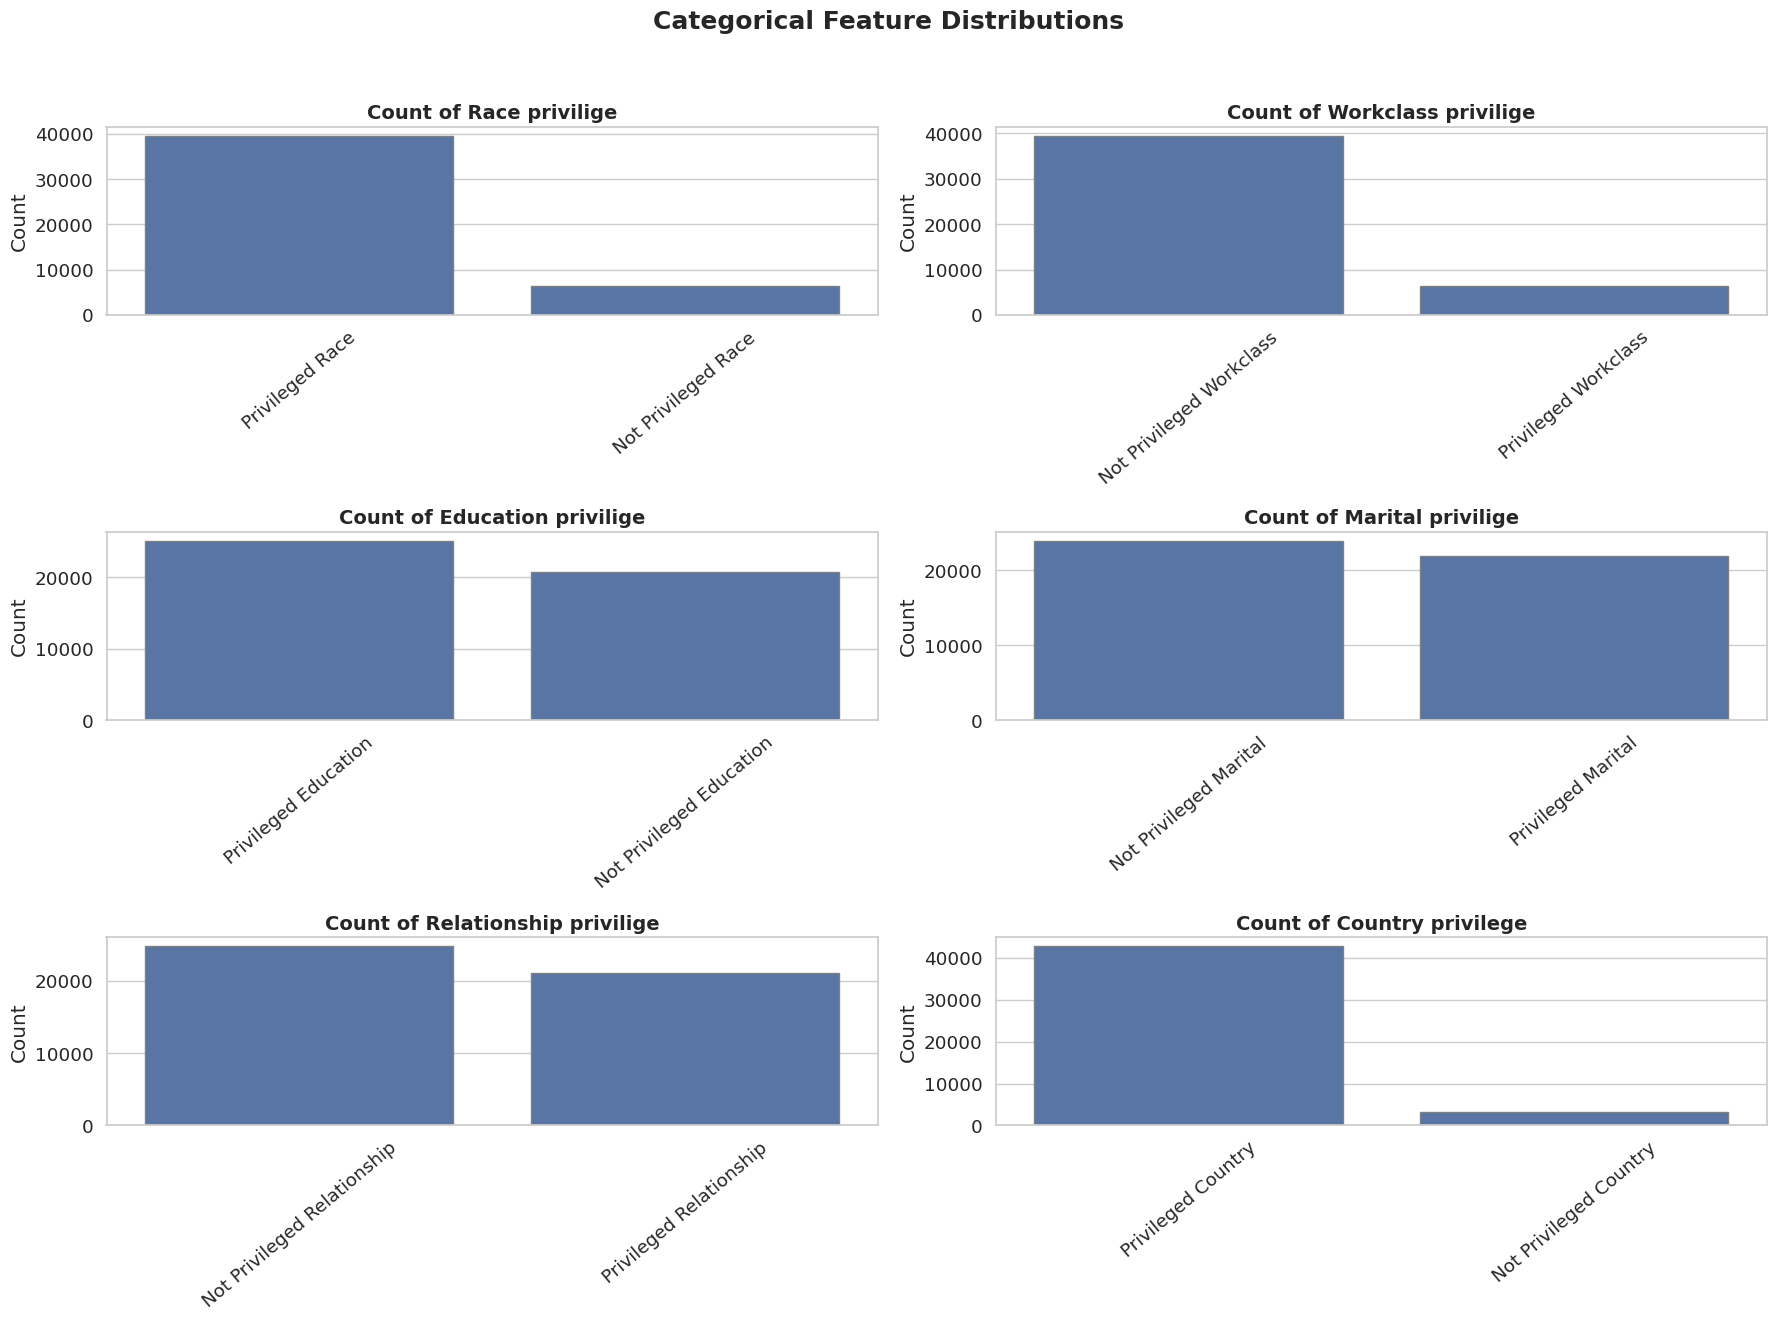

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern seaborn theme
sns.set_theme(style="whitegrid", palette="deep", font_scale=1.2)

cat_cols = ['race_privilige', 'workclass_privilige',
       'education_privilige', 'marital_privilige', 'relationship_privilige',
       'country_privilege']

n = len(cat_cols)
cols = 2  # number of columns in the grid
rows = (n + 1) // cols  # number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 4.5))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i],
                  order=df[col].value_counts().index,
                  edgecolor='gray')
    axes[i].set_title(f'Count of {prettify_column(col)}', fontsize=14, weight='bold')
    axes[i].tick_params(axis='x', rotation=40)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Categorical Feature Distributions", fontsize=18, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for the super title
plt.show()


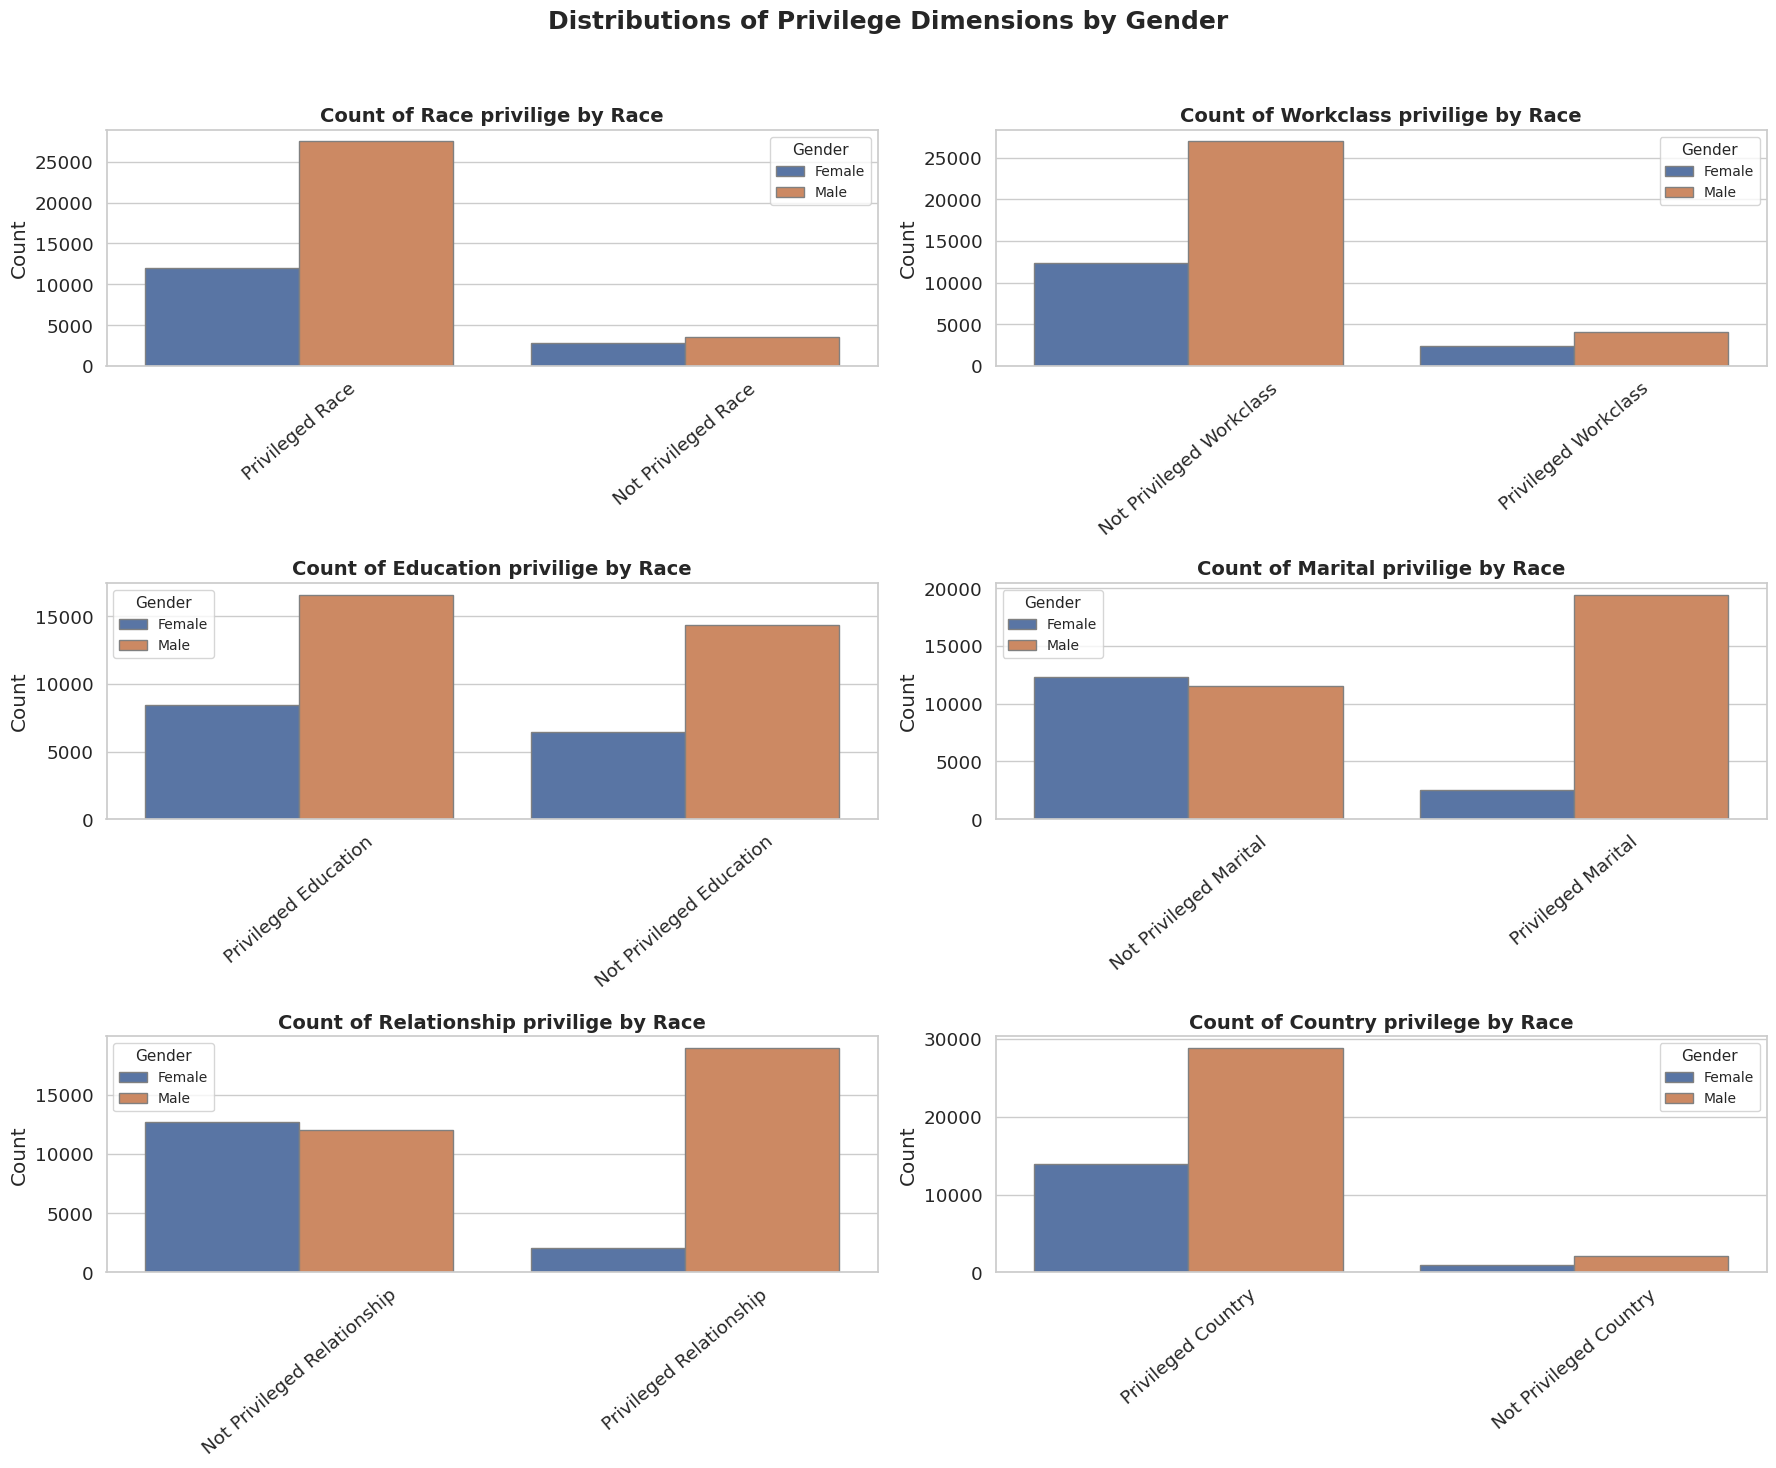

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="deep", font_scale=1.2)

cat_cols = [
    'race_privilige', 'workclass_privilige',
    'education_privilige', 'marital_privilige',
    'relationship_privilige', 'country_privilege'
]

n = len(cat_cols)
cols = 2
rows = (n + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(
        data=df,
        x=col,
        hue='gender',
        ax=axes[i],
        order=df[col].value_counts().index,
        edgecolor='gray'
    )
    axes[i].set_title(f'Count of {col.replace("_", " ").capitalize()} by Race', fontsize=14, weight='bold')
    axes[i].tick_params(axis='x', rotation=40)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Gender', fontsize=10, title_fontsize=11)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distributions of Privilege Dimensions by Gender", fontsize=18, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


<ipython-input-14-1286252984>:43: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.96])


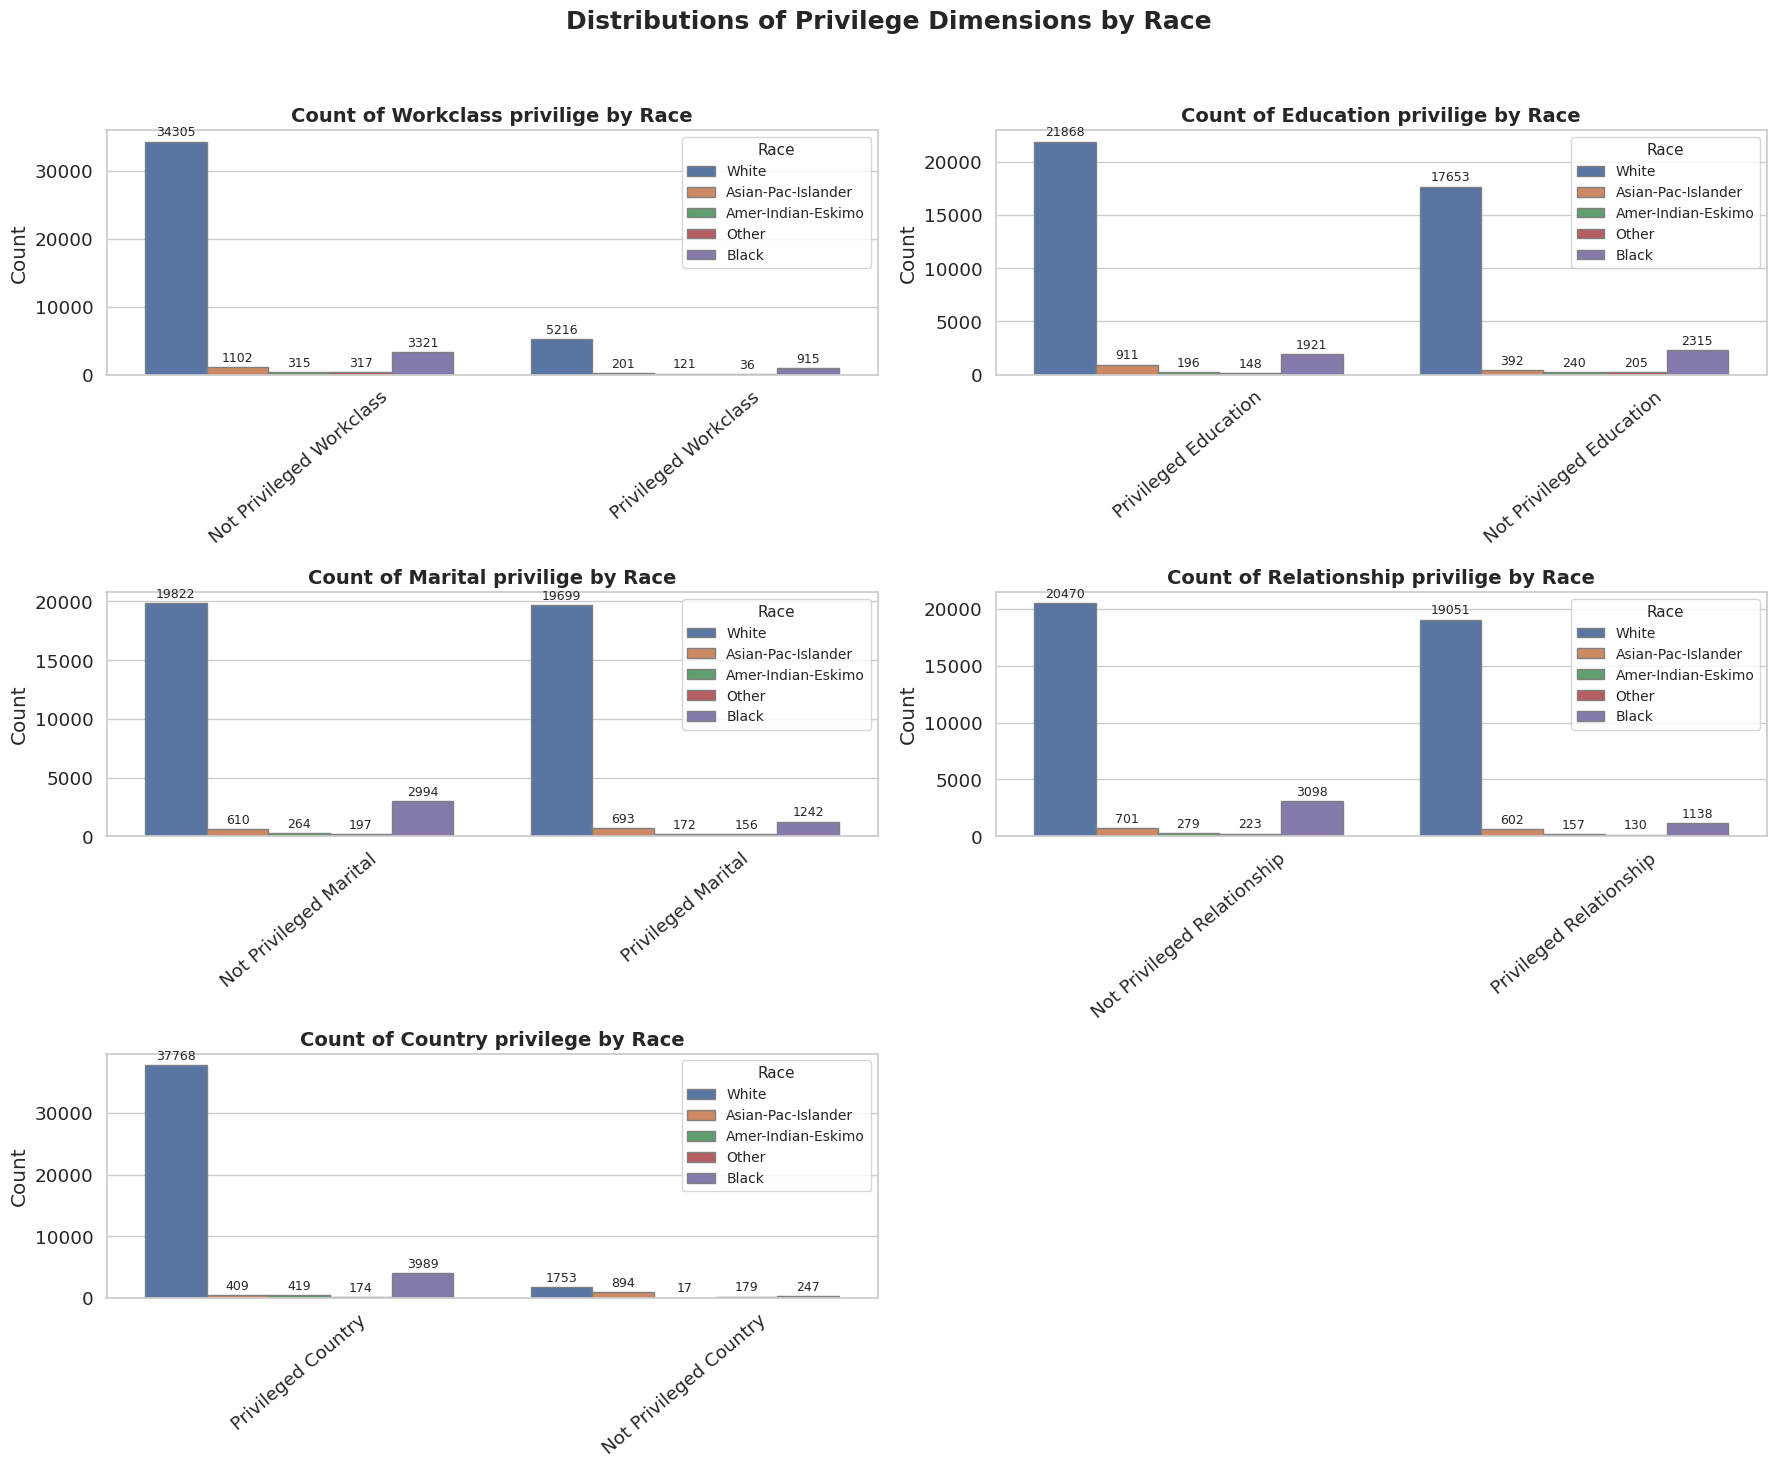

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="deep", font_scale=1.2)

cat_cols = [ 'workclass_privilige',
    'education_privilige', 'marital_privilige',
    'relationship_privilige', 'country_privilege'
]

n = len(cat_cols)
cols = 2
rows = (n + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    order = df[col].value_counts().index.tolist()

    ax = sns.countplot(
        data=df,
        x=col,
        hue='race',
        order=order,
        ax=axes[i],
        edgecolor='gray'
    )

    for container in ax.containers:
        ax.bar_label(container, fontsize=9, padding=2)

    ax.set_title(f'Count of {col.replace("_", " ").capitalize()} by Race', fontsize=14, weight='bold')
    ax.tick_params(axis='x', rotation=40)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.legend(title='Race', fontsize=10, title_fontsize=11)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distributions of Privilege Dimensions by Race", fontsize=18, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


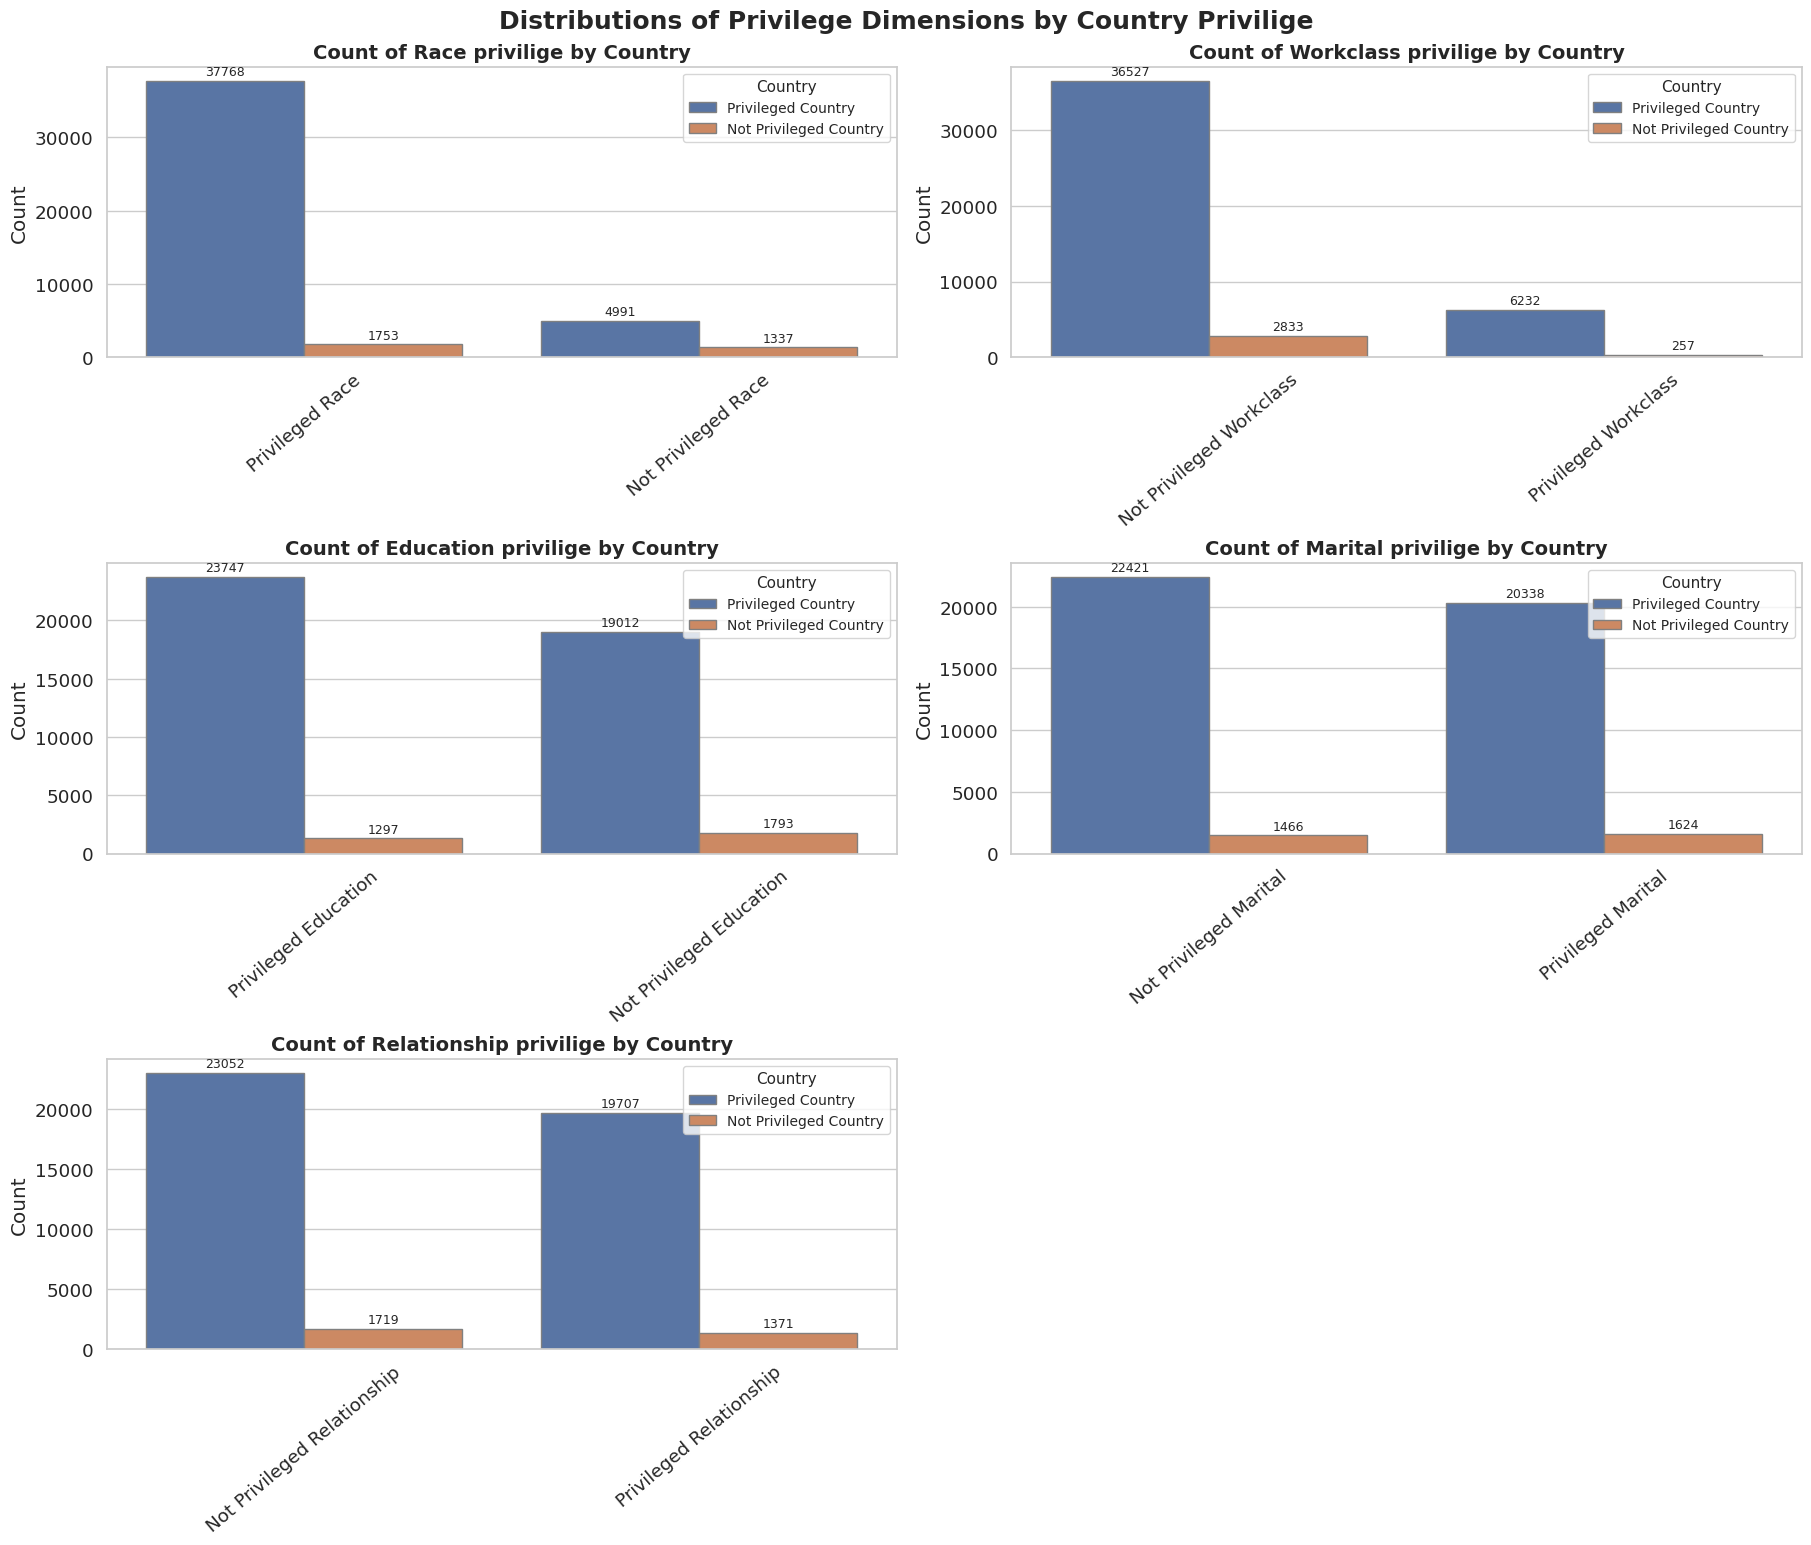

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="deep", font_scale=1.2)

cat_cols = [
    'race_privilige', 'workclass_privilige',
    'education_privilige', 'marital_privilige',
    'relationship_privilige'
]

n = len(cat_cols)
cols = 2
rows = (n + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    order = df[col].value_counts().index.tolist()

    ax = sns.countplot(
        data=df,
        x=col,
        hue='country_privilege',
        order=order,
        ax=axes[i],
        edgecolor='gray'
    )

    for container in ax.containers:
        ax.bar_label(container, fontsize=9, padding=2)

    ax.set_title(f'Count of {col.replace("_", " ").capitalize()} by Country', fontsize=14, weight='bold')
    ax.tick_params(axis='x', rotation=40)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.legend(title='Country', fontsize=10, title_fontsize=11)

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Optional: adjust title spacing if needed
fig.suptitle("Distributions of Privilege Dimensions by Country Privilige", fontsize=18, weight='bold', y=1.02)

plt.show()


### Data Analysis - Numerical features

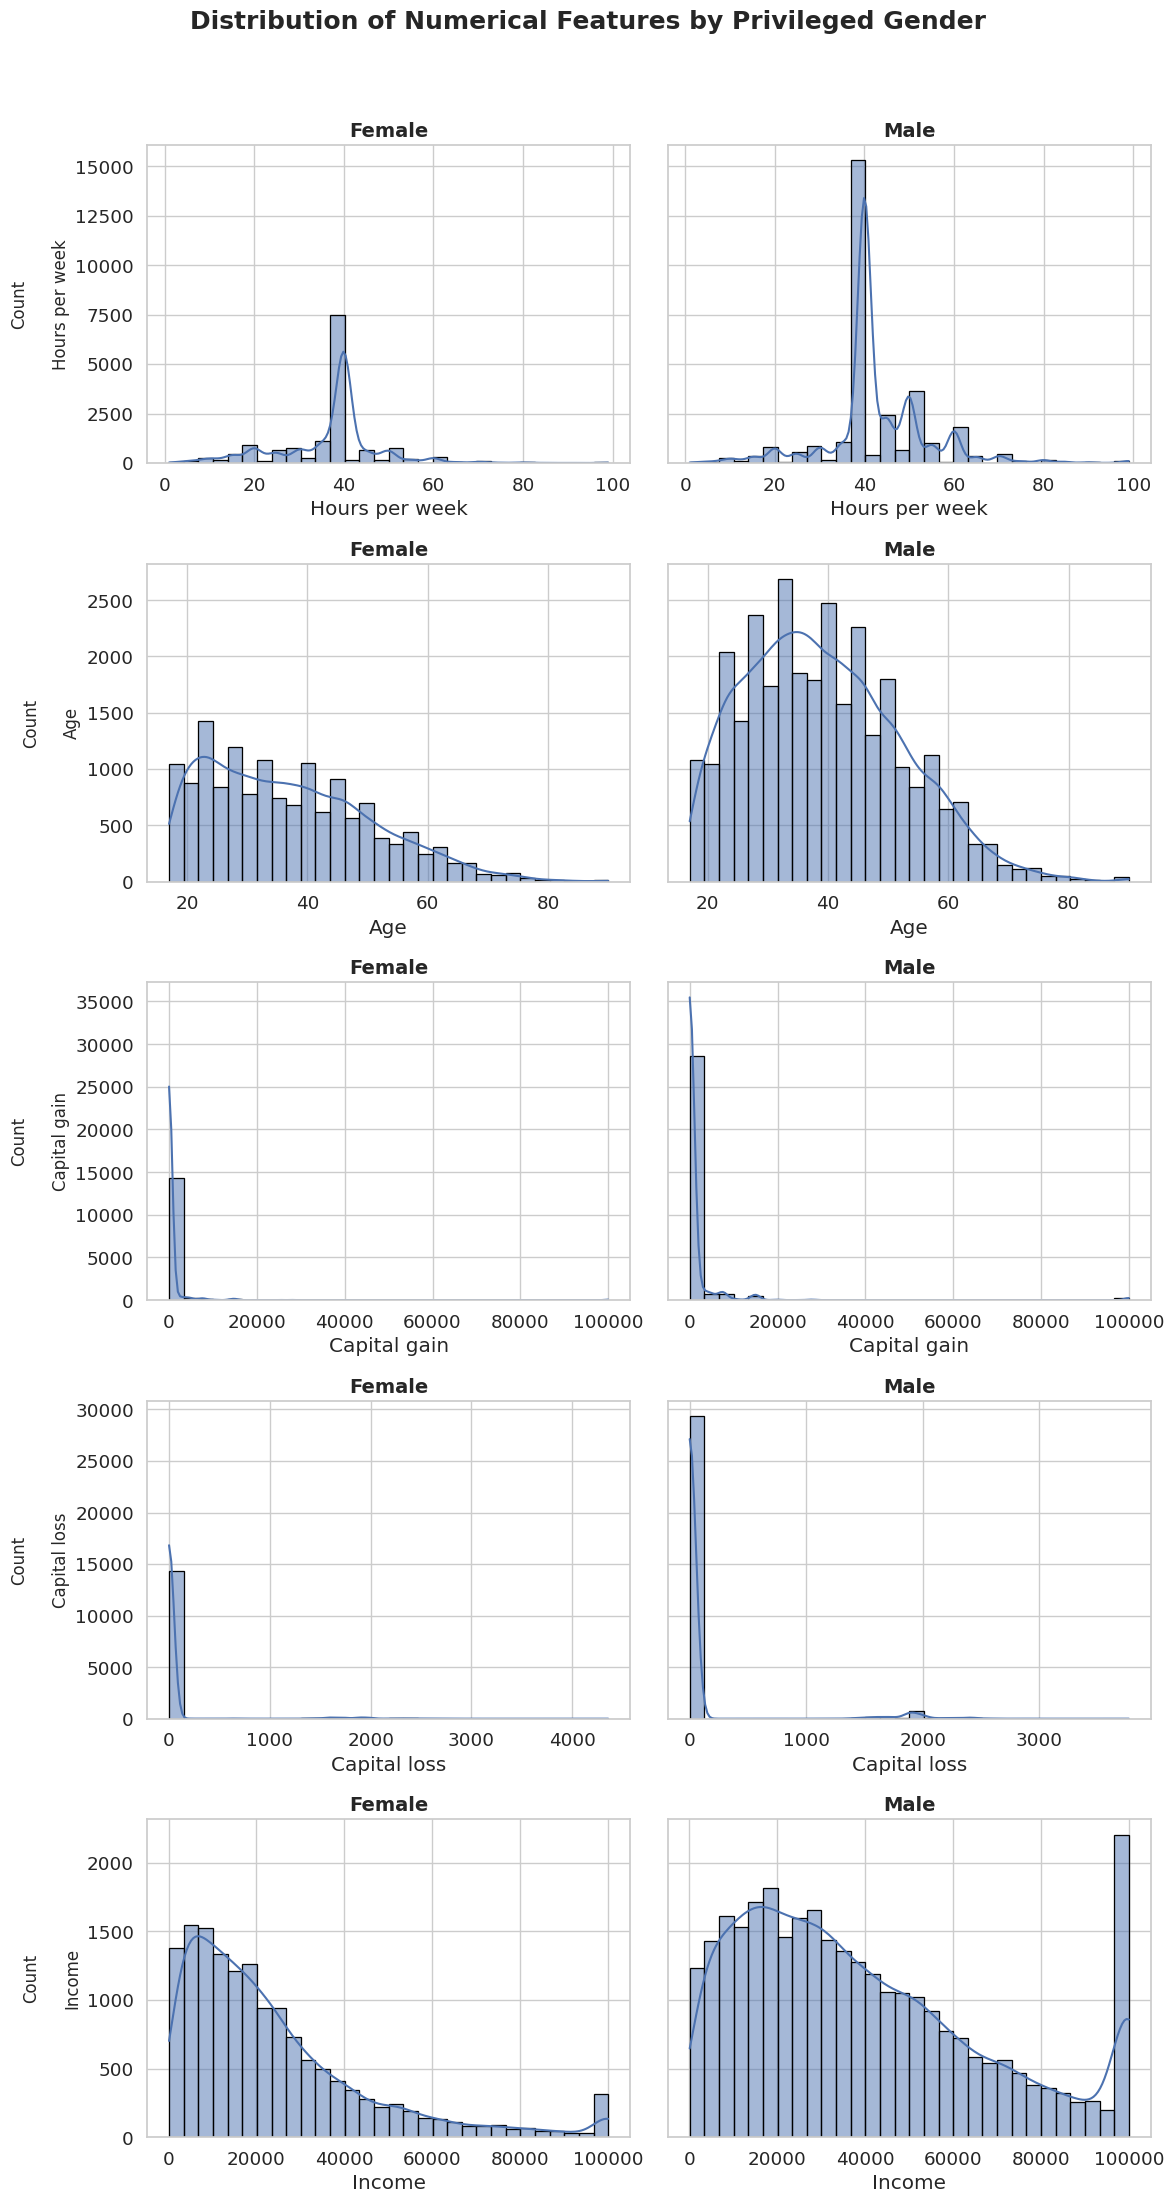

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="deep", font_scale=1.2)

num_cols = ['hours-per-week', 'age', 'capital-gain', 'capital-loss', 'income']
genders = df['gender'].unique()

n = len(num_cols)
cols = 2
rows = n

fig, axes = plt.subplots(rows, len(genders), figsize=(len(genders)*6, rows*4.5), sharey='row')

for i, col in enumerate(num_cols):
    for j, gender in enumerate(genders):
        ax = axes[i, j] if len(genders) > 1 else axes[i]
        subset = df[df['gender'] == gender]

        sns.histplot(
            data=subset,
            x=col,
            kde=True,
            bins=30,
            ax=ax,
            edgecolor='black'
        )

        ax.set_title(f'{gender}', fontsize=14, weight='bold')
        if j == 0:
            ax.set_ylabel(f'Count\n\n{col.replace("-", " ").capitalize()}', fontsize=12)
        else:
            ax.set_ylabel('')

        ax.set_xlabel(col.replace("-", " ").capitalize())


plt.suptitle("Distribution of Numerical Features by Privileged Gender", fontsize=18, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


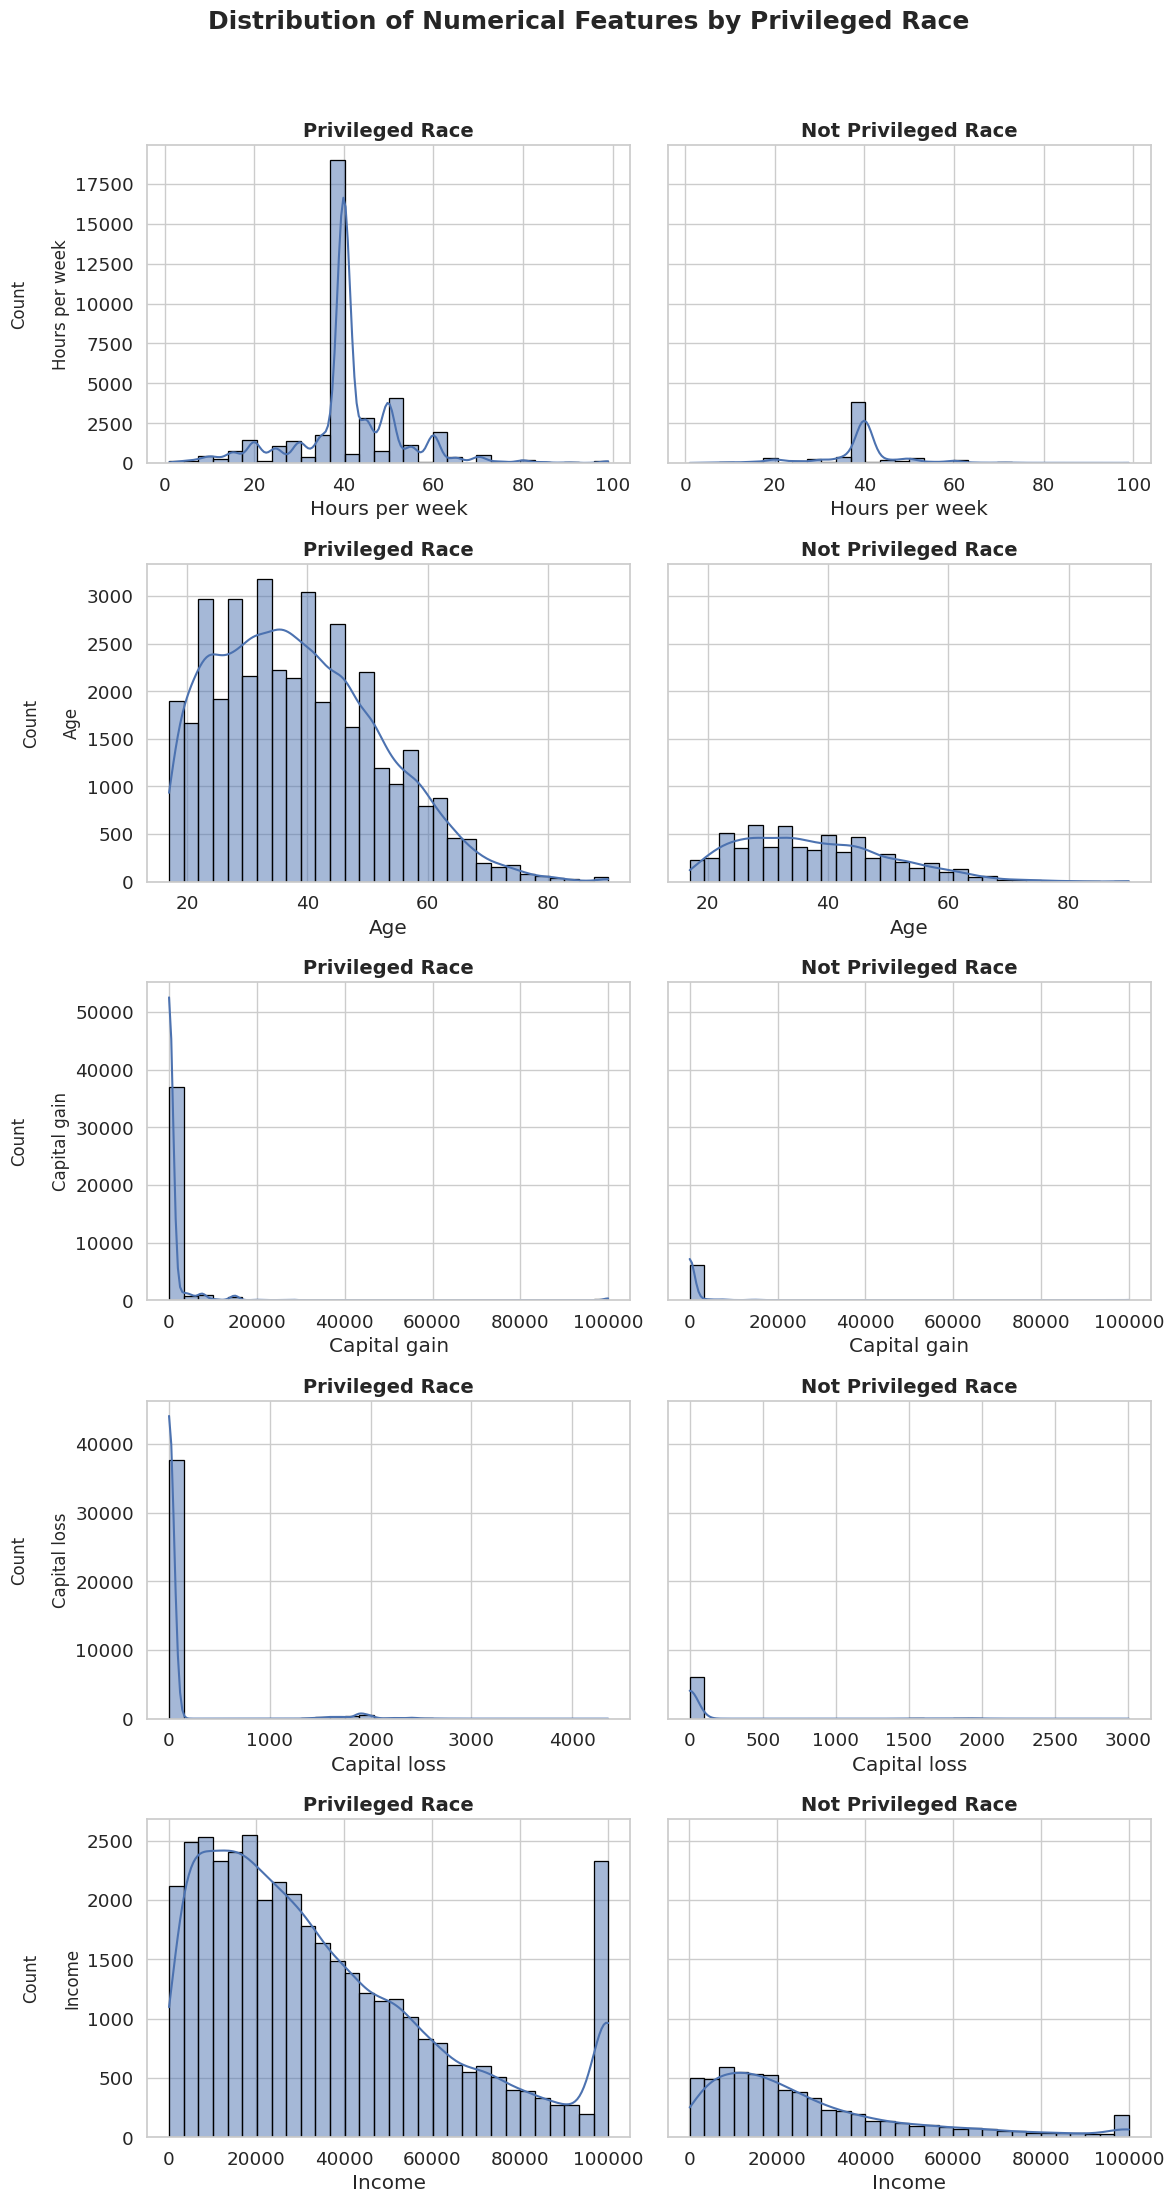

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="deep", font_scale=1.2)

num_cols = ['hours-per-week', 'age', 'capital-gain', 'capital-loss', 'income']
genders = df['race_privilige'].unique()

n = len(num_cols)
cols = 2
rows = n

fig, axes = plt.subplots(rows, len(genders), figsize=(len(genders)*6, rows*4.5), sharey='row')

for i, col in enumerate(num_cols):
    for j, gender in enumerate(genders):
        ax = axes[i, j] if len(genders) > 1 else axes[i]
        subset = df[df['race_privilige'] == gender]

        sns.histplot(
            data=subset,
            x=col,
            kde=True,
            bins=30,
            ax=ax,
            edgecolor='black'
        )

        ax.set_title(f'{gender}', fontsize=14, weight='bold')
        if j == 0:
            ax.set_ylabel(f'Count\n\n{col.replace("-", " ").capitalize()}', fontsize=12)
        else:
            ax.set_ylabel('')

        ax.set_xlabel(col.replace("-", " ").capitalize())


plt.suptitle("Distribution of Numerical Features by Privileged Race", fontsize=18, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


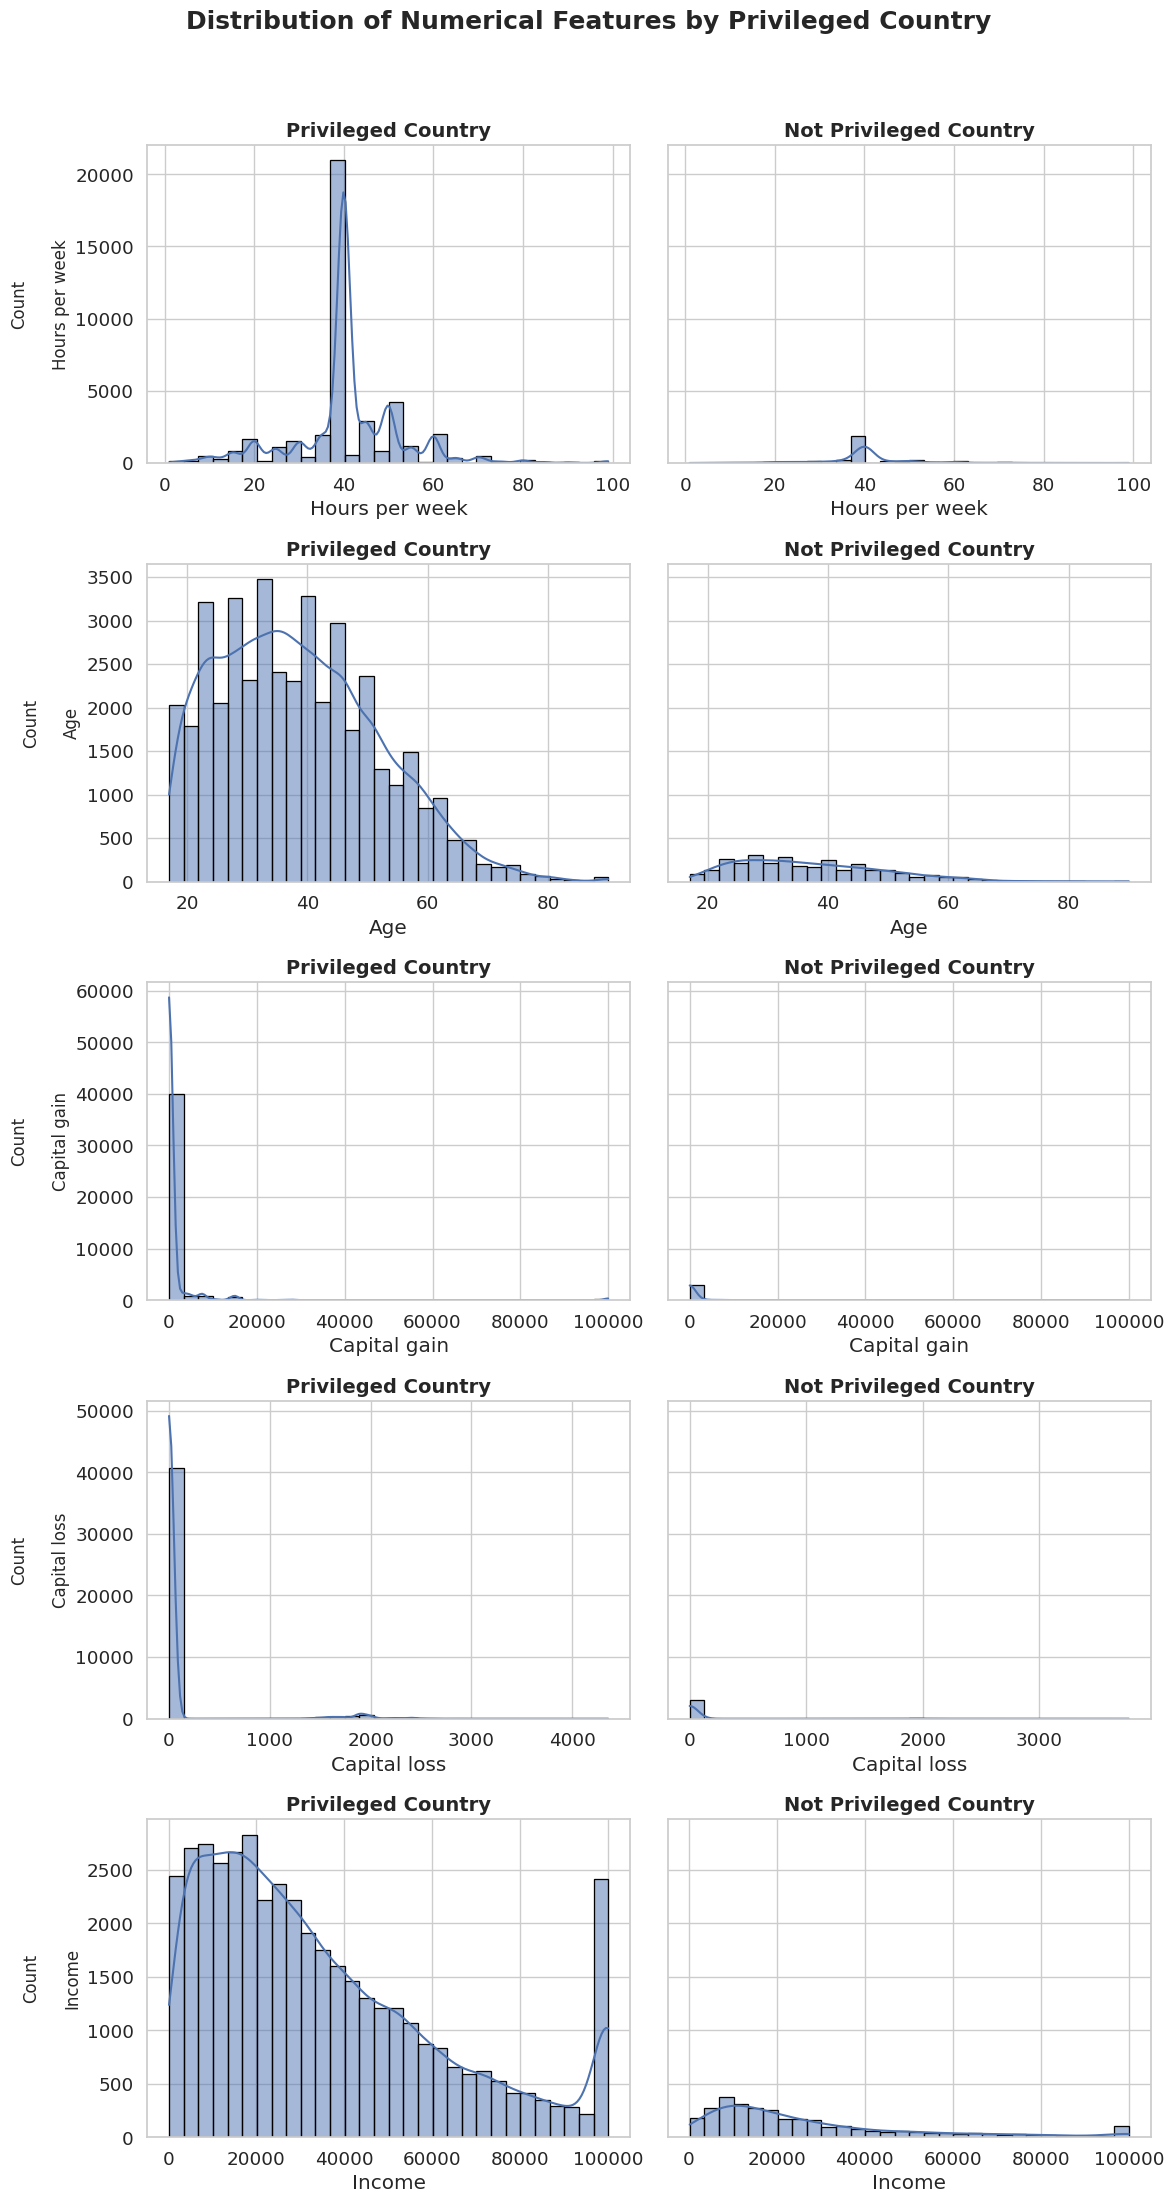

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="deep", font_scale=1.2)

num_cols = ['hours-per-week', 'age', 'capital-gain', 'capital-loss', 'income']
genders = df['country_privilege'].unique()

n = len(num_cols)
cols = 2
rows = n

fig, axes = plt.subplots(rows, len(genders), figsize=(len(genders)*6, rows*4.5), sharey='row')

for i, col in enumerate(num_cols):
    for j, gender in enumerate(genders):
        ax = axes[i, j] if len(genders) > 1 else axes[i]
        subset = df[df['country_privilege'] == gender]

        sns.histplot(
            data=subset,
            x=col,
            kde=True,
            bins=30,
            ax=ax,
            edgecolor='black'
        )

        ax.set_title(f'{gender}', fontsize=14, weight='bold')
        if j == 0:
            ax.set_ylabel(f'Count\n\n{col.replace("-", " ").capitalize()}', fontsize=12)
        else:
            ax.set_ylabel('')

        ax.set_xlabel(col.replace("-", " ").capitalize())


plt.suptitle("Distribution of Numerical Features by Privileged Country", fontsize=18, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Farther Analysis

<ipython-input-19-1204029881>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-19-1204029881>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-19-1204029881>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


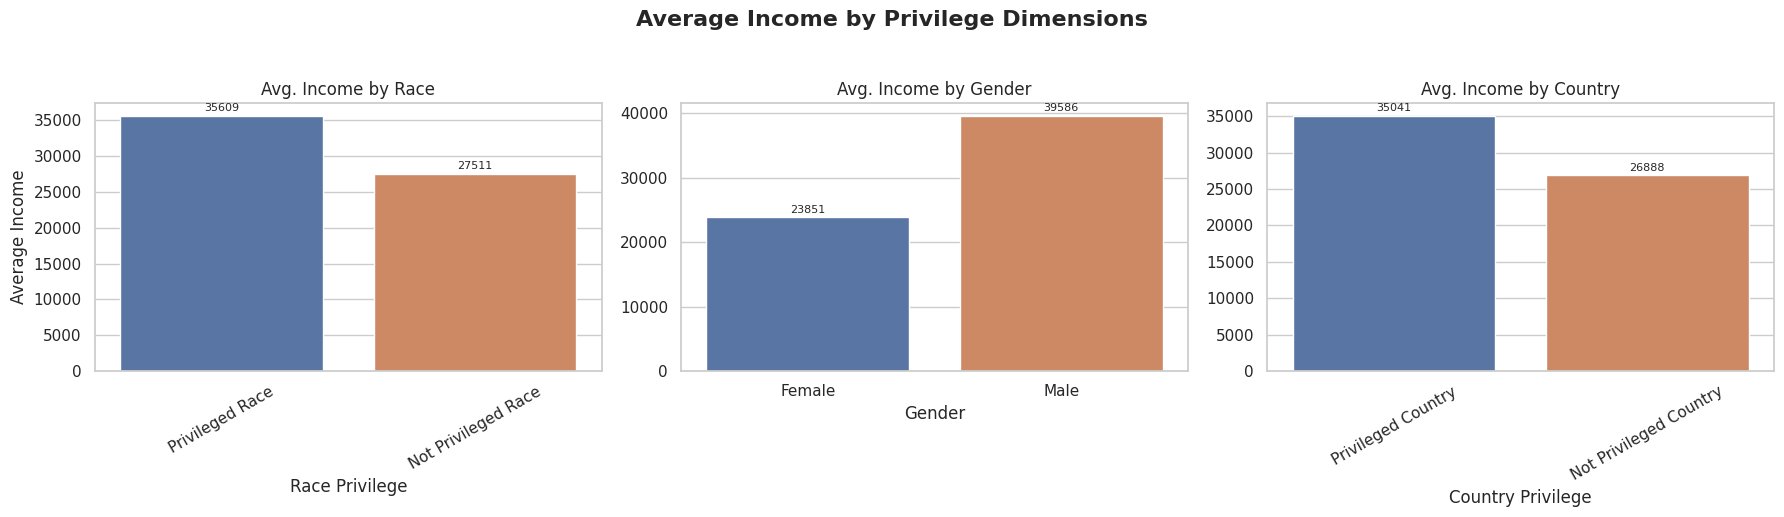

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", font_scale=1.0)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(
    data=df,
    x="race_privilige",
    y="income",
    ax=axes[0],
    palette="deep",
    errorbar=None
)
axes[0].set_title("Avg. Income by Race")
axes[0].tick_params(axis='x', rotation=30)
axes[0].set_ylabel("Average Income")
axes[0].set_xlabel("Race Privilege")

sns.barplot(
    data=df,
    x="gender",
    y="income",
    ax=axes[1],
    palette="deep",
    errorbar=None
)
axes[1].set_title("Avg. Income by Gender")
axes[1].tick_params(axis='x', rotation=0)
axes[1].set_ylabel("")
axes[1].set_xlabel("Gender")

sns.barplot(
    data=df,
    x="country_privilege",
    y="income",
    ax=axes[2],
    palette="deep",
    errorbar=None
)
axes[2].set_title("Avg. Income by Country")
axes[2].tick_params(axis='x', rotation=30)
axes[2].set_ylabel("")
axes[2].set_xlabel("Country Privilege")

for ax in axes:
    for c in ax.containers:
        ax.bar_label(c, fmt='%.0f', fontsize=8, padding=2)

plt.suptitle("Average Income by Privilege Dimensions", fontsize=16, weight='bold', y=1.03)
plt.tight_layout()
plt.show()


<ipython-input-20-2809722597>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


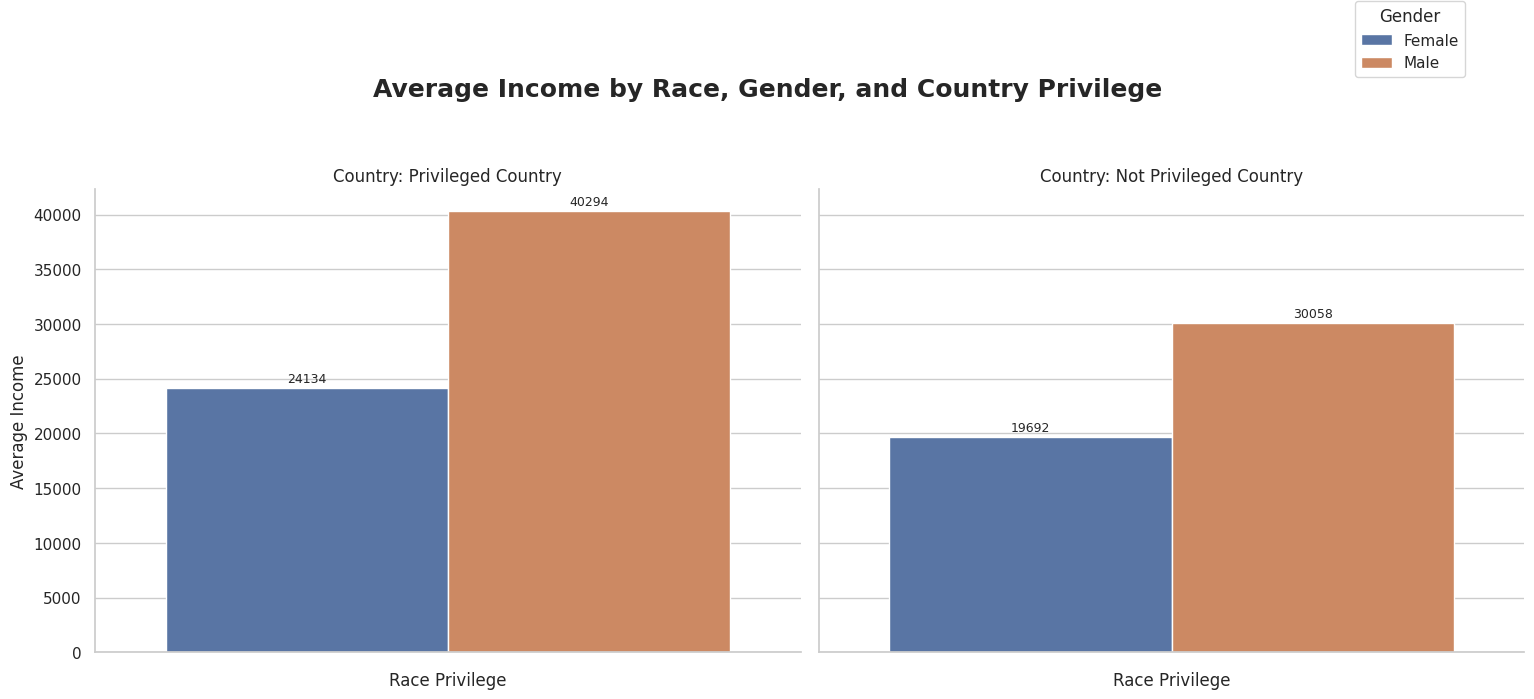

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


g = sns.catplot(
    data=df,
    y="income",
    hue="gender",
    col="country_privilege",
    kind="bar",
    height=6,
    aspect=1.2,
    palette="deep",
    ci=None
)

g.set_titles(col_template="Country: {col_name}")
g.set_axis_labels("Race Privilege", "Average Income")
g._legend.set_title("Gender")
g._legend.set_bbox_to_anchor((0.95, 1.1))
g._legend.set_frame_on(True)

for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=30)
    for c in ax.containers:
        ax.bar_label(c, fmt='%.0f', fontsize=9, padding=2)

plt.suptitle("Average Income by Race, Gender, and Country Privilege", y=1.05, fontsize=18, weight='bold')
plt.tight_layout()
plt.show()


### Splitting the data + normalization

In [21]:
from sklearn.model_selection import train_test_split

# For example, 80% train, 20% test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


### Normalization of numerical values (train and test separate)

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

num_cols = ['hours-per-week', 'age', 'capital-gain', 'capital-loss']

X_train = train_df.drop(columns='income')
y_train = train_df['income']
X_test = test_df.drop(columns='income')
y_test = test_df['income']

scaler.fit(X_train[num_cols])

X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print(X_train.head())

       hours-per-week       age  capital-gain  capital-loss         workclass  \
20480       -0.074459 -0.865543     -0.145701     -0.217673  Self-emp-not-inc   
13010       -0.911185 -1.243874     -0.145701     -0.217673           Private   
31191        2.017357 -0.033215     -0.145701     -0.217673           Private   
7069        -0.074459 -0.184548     -0.145701     -0.217673         State-gov   
4867        -0.074459 -0.260214     -0.145701     -0.217673           Private   

       education  education-num marital-status   relationship   race  ...  \
20480  Assoc-voc             11  Never-married      Own-child  White  ...   
13010    HS-grad              9  Never-married  Not-in-family  Black  ...   
31191       11th              7       Divorced  Not-in-family  White  ...   
7069   Bachelors             13       Divorced      Unmarried  White  ...   
4867        11th              7      Separated      Unmarried  Black  ...   

            education_mapped      marital_mapped  

## SP on Normlised Data

In [23]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [24]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

ValueError: could not convert string to float: 'Self-emp-not-inc'

In [ ]:
train_df.head()